In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Conceptual

### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### (a)
The sample size n is extremely large, and the number of predictors p is small.

**Answer:** Both methods can have good performance. However, since the sample size is large, flexible methods can find hidden relationships and have a edge.

#### (b)
The number of predictors p is extremely large, and the number
of observations n is small.

**Answer:** Flexible methods tends to overfit when the number of samples is small. Having a high number of predictors isn't a problem since most of the features can be removed, leaving only the small selection of features that better explain the response variable.

#### (c)
The relationship between the predictors and response is highly
non-linear.

**Answer:** A flexible method is a better because non-linear relationship is hard to model with rigid approaches.

#### (d)
The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely
high.

**Answer:** Flexible methods overfit on high variance.

### 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

**(a)** 

We collect a set of data on the top 500 firms in the US. For each
firm we record profit, number of employees, industry and the
CEO salary. We are interested in understanding which factors
affect CEO salary.

**Answer:** Regression; inference; n=500; p=3

**(b)**

We are considering launching a new product and wish to know
whether it will be a success or a failure. We collect data on 20
similar products that were previously launched. For each product we have recorded whether it was a success or failure, price
charged for the product, marketing budget, competition price,
and ten other variables.


**Answer:** Classification; prediction; n=20; p=13

**(c)** 

We are interested in predicting the % change in the USD/Euro
exchange rate in relation to the weekly changes in the world
stock markets. Hence we collect weekly data for all of 2012. For
each week we record the % change in the USD/Euro, the %
change in the US market, the % change in the British market,
and the % change in the German market.

**Answer:** Regression; prediction; n=52; p=3

### 3. We now revisit the bias-variance decomposition.

#### (a)

Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods
towards more flexible approaches. The x-axis should represent
the amount of flexibility in the method, and the y-axis should
represent the values for each curve. There should be five curves.
Make sure to label each one.

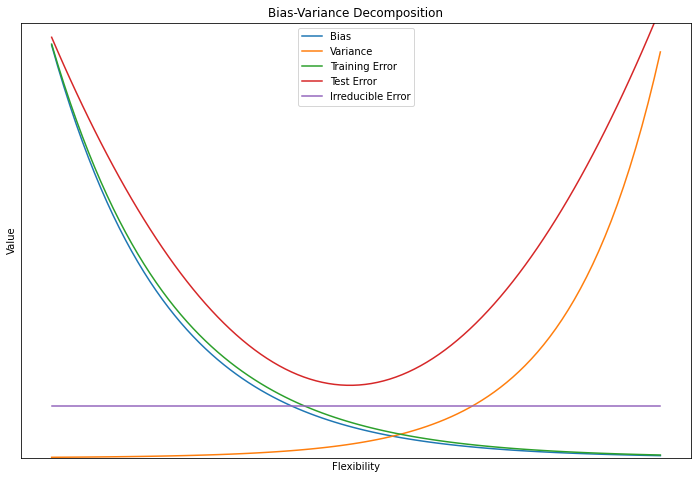

In [2]:
flexibility = np.linspace(1, 101, 100)

bias = np.exp(-(1/19)*flexibility) 
variance = np.exp((1/15)*flexibility) / 900
training = np.exp(-(1/20)*flexibility) 
test = (10*flexibility**2 - 1000*flexibility + 30000)/ 30000
irreducible = 0.12

curves = [bias, variance, training, test, irreducible]

fig, ax = plt.subplots(figsize=(12,8))
for i, curve in enumerate(curves):
    sns.lineplot(
        x = flexibility,
        y = curve
    )

plt.legend(['Bias', 'Variance', 'Training Error', 'Test Error', 'Irreducible Error'], loc='upper center')

plt.xticks([])
plt.yticks([])

plt.title('Bias-Variance Decomposition')
plt.xlabel('Flexibility')
plt.ylabel('Value')

ax.set_ylim(0,1);

#### (b) 

Explain why each of the five curves has the shape displayed in
part (a).

**Answer:** As variance grows, bias diminishes:

$$ 
MSE(\hat{\theta}) = (Bias(\hat{\theta},\theta))^2 + Var(\hat{\theta})
$$

Training error will approach zero long you add enough flexibility to the model. However, too much flexibility makes the model fit on random noise that will make the test error grows.

### 4. You will now think of some real-life applications for statistical learning.

#### (a)

Describe three real-life applications in which classification might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.

**Answer:** 

Cancer Detection

* response: if any region in a image is a tumor
* predictors: image of the area that could have the tumor
* goal: prediction

Email Spam Detection

* response: if a email is a spam
* predictors: words, phrases, and mail address
* goal: prediction

Food/Drink quality

* response: level of quality
* predictors: ingredients, chemical profile, preparation methods...
* goal: inference and prediction

#### (b)

Describe three real-life applications in which regression might
be useful. Describe the response, as well as the predictors. Is the
goal of each application inference or prediction? Explain your
answer.

**Answer:** 

Income

* response: income
* predictors: job, family, residence, education...
* goal: inference

Grades

* response: grades
* predictors: hours of study, sleep patterns, extra courses taken...
* goal: inference

Stock prices

* response: price movement
* predictors: historical price, historical market conditions...
* goal: inference and prediction

#### (c)

Describe three real-life applications in which cluster analysis
might be useful

**Answer:**  Genetic Analysis, Market Surveys, Anomaly Detection

### 5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred

**Answer:** More flexible approaches are preferred when the goal is accuracy. When inference is the goal, the less flexible but more interpretable approaches are better choices.

### 6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a nonparametric approach)? What are its disadvantages?

**Answer:** Parametric models assumes a function that describes the relationship between the dependent and independents variables, while a non-parametric approach does not make such assumption.

Parametric models simplifies the problem since it is easier to estimates the coeficients with few observations, while a non-parametric approach needs larges amounts of data. However, there is a risk of choosing the wrong function while also being at the risk of overfitting by having too much coefficients.

### 7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

| Obs. | X1 | X2 | X3 | Y |
| - | - | - | - | - |
| 1 | 0 | 3 | 0 | Red |
| 2 | 2 | 0 | 0 | Red |
| 3 | 0 | 1 | 3 | Red |
| 4 | 0 | 1 | 2 | Green |
| 5 | −1 | 0 | 1 | Green |
| 6 | 1 | 1 | 1 | Red |

Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

#### (a)

Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [3]:
print('Obs. 1:', np.sqrt(3**2))
print('Obs. 2:', np.sqrt(2**2))
print('Obs. 3:', np.sqrt(1**2 + 3**2))
print('Obs. 4:', np.sqrt(1**2 + 2**2))
print('Obs. 5:', np.sqrt((-1)**2 + 1**2))
print('Obs. 6:', np.sqrt(1**2 + 1**2 + 1**2))

Obs. 1: 3.0
Obs. 2: 2.0
Obs. 3: 3.1622776601683795
Obs. 4: 2.23606797749979
Obs. 5: 1.4142135623730951
Obs. 6: 1.7320508075688772


#### (b) 
What is our prediction with K = 1? Why?

**Answer:** Green since the nearest neighboor is the observation 5.

#### (c) 
What is our prediction with K = 3? Why?

**Answer:** Red since the 3 nearest neighboors have the majority count (2) of observations = Red.

#### (d)
If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

**Answer:** Small because large K produces a decision boundary close to linear.

# Applied

### 8. This exercise relates to the `College` data set, which can be found in the file `College.csv` on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

| Variable | Description |
| --- | --- |
| Private | Public/private indicator |
| Apps | Number of applications received |
| Accept | Number of applicants accepted |
| Enroll | Number of new students enrolled |
| Top10perc | New students from top 10 % of high school class |
| Top25perc | New students from top 25 % of high school class |
| F.Undergrad | Number of full-time undergraduates |
| P.Undergrad | Number of part-time undergraduates |
| Outstate | Out-of-state tuition |
| Room.Board | Room and board costs |
| Books | Estimated book costs |
| Personal | Estimated personal spending |
| PhD | Percent of faculty with Ph.D.’s |
| Terminal | Percent of faculty with terminal degree |
| S.F.Ratio | Student/faculty ratio |
| perc.alumni | Percent of alumni who donate |
| Expend | Instructional expenditure per student |
| Grad.Rate | Graduation rate |

Before reading the data into `R`, it can be viewed in Excel or a text
editor.

#### (a)
Use the `read.csv()` function to read the data into R. Call the loaded data `college`. Make sure that you have the directory set to the correct location for the data.

In [4]:
college = pd.read_csv('../data/statlearning/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### (b) 
Look at the data using the `View()` function. You should notice that the first column is just the name of each university. We don’t really want R to treat this as data. However, it may be handy to have these names for later. Try the following commands:

> rownames (college) <- college\[, 1\]

> View (college)

You should see that there is now a row.names column with the
name of each university recorded. This means that R has given
each row a name corresponding to the appropriate university. R
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try

> college <- college\[, -1\]

> View (college)

Now you should see that the first data column is Private. Note
that another column labeled row.names now appears before the
Private column. However, this is not a data column but rather
the name that R is giving to each row.

In [5]:
college = pd.read_csv('../data/statlearning/College.csv', index_col=0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

#### (c)

***i.*** Use the summary() function to produce a numerical summary
of the variables in the data set.

***ii.*** Use the pairs() function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
A[,1:10].
56 2. Statistical Learning

***iii.*** Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.

***iv.*** Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10 % of their high school
classes exceeds 50 %.

> Elite <- rep ("No", nrow (college))

> Elite \[college\$Top10perc \> 50\] <- " Yes "

> Elite <- as. factor (Elite)

> college <- data . frame (college , Elite)

Use the summary() function to see how many elite universities there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

***v.*** Use the hist() function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. You may find the command par(mfrow = c(2, 2))
useful: it will divide the print window into four regions so
that four plots can be made simultaneously. Modifying the
arguments to this function will divide the screen in other
ways.

***vi.*** Continue exploring the data, and provide a brief summary
of what you discover.

In [7]:
# i.
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


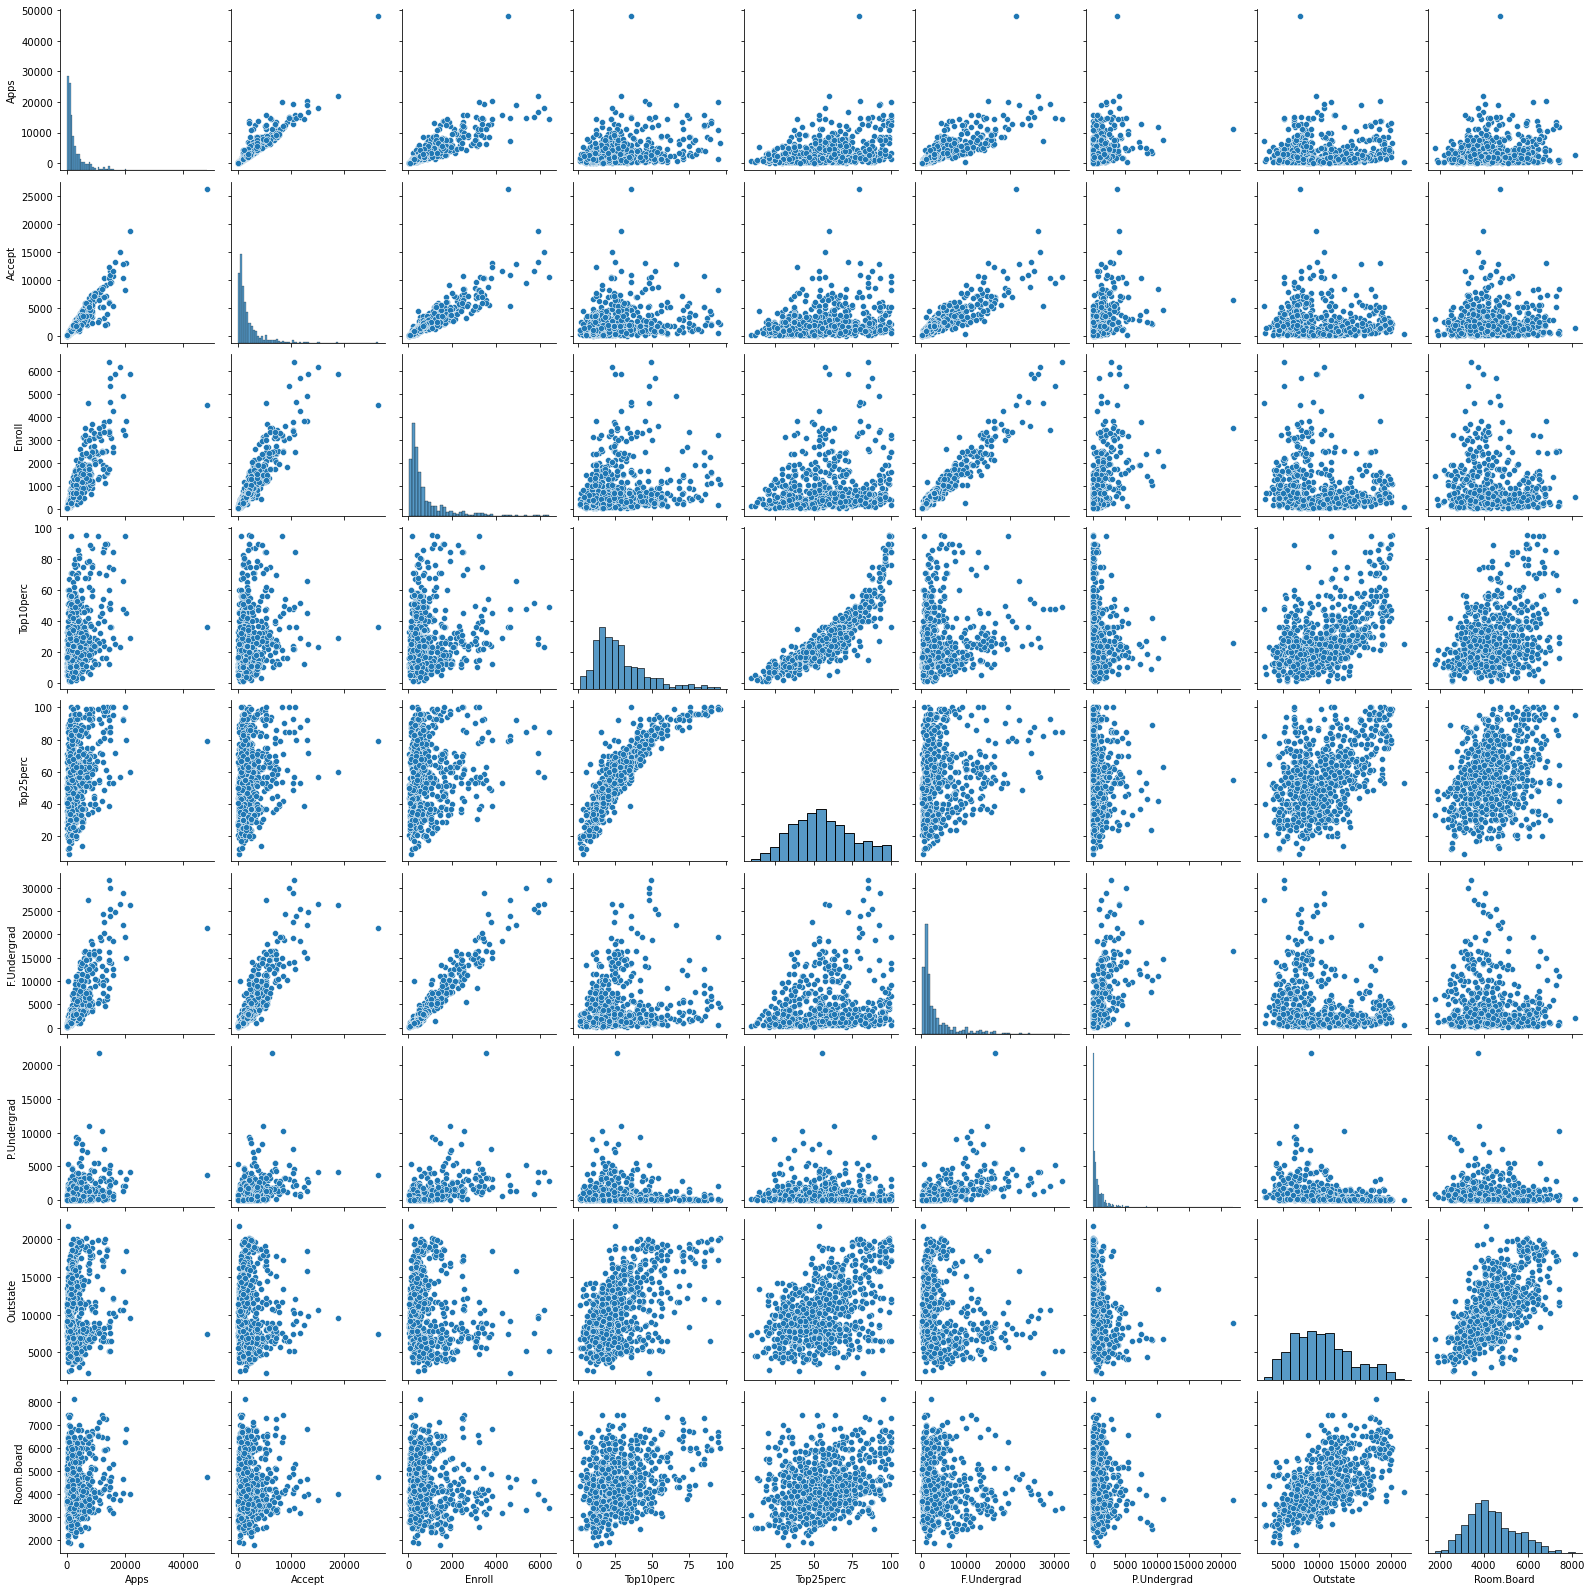

In [8]:
# ii.
sns.pairplot(college.iloc[:,:10]);

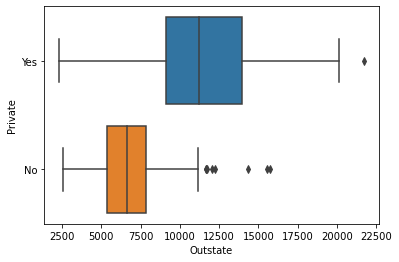

In [9]:
# iii.
sns.boxplot(
    y = 'Private',
    x = 'Outstate',
    data = college
);

In [10]:
# iv.
college['Elite'] = np.where(college['Top10perc']>50, 'Yes', 'No')
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

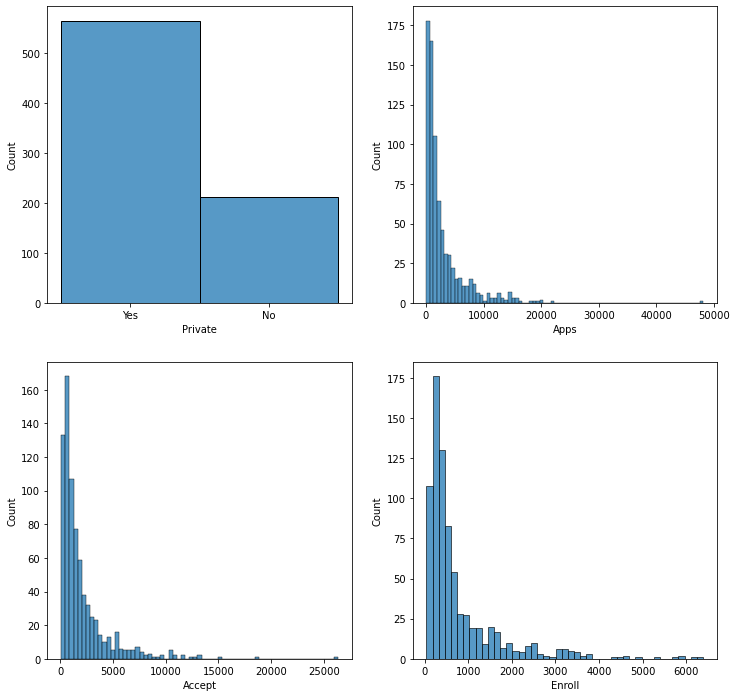

In [11]:
# v.
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax = ax.flatten()

for i, col in enumerate(college.columns):
    if i == len(ax.flatten()):
        break
    sns.histplot(
        ax = ax[i],
        x = col,
        data = college,
        #bins = 5
    )

In [12]:
# vi.

### 9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [13]:
auto = pd.read_csv('../data/statlearning/Auto.csv')
auto = auto.replace('?', np.NaN).dropna()
auto['horsepower'] = auto['horsepower'].astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


In [15]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### (a)
Which of the predictors are quantitative, and which are qualitative?


**Answer:** The variables `cylinders` and `year` are quantitative, but could be treated as qualitative. Also, `name` is also qualitative, but to be used as a predictor it would need a treatment (e.g. grouped by maker). Everything else is quantitative, while `origin` is the response class. 

#### (b) 
What is the range of each quantitative predictor? You can answer this using the range() function.


In [16]:
auto.min(0, numeric_only=True)

mpg                9.0
cylinders          3.0
displacement      68.0
horsepower        46.0
weight          1613.0
acceleration       8.0
year              70.0
origin             1.0
dtype: float64

In [17]:
auto.max(0, numeric_only=True)

mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
origin             3.0
dtype: float64

#### (c) 
What is the mean and standard deviation of each quantitative
predictor?


In [18]:
print(auto.mean(0, numeric_only=True))

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64


In [19]:
print(auto.std(0, numeric_only=True))

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
origin            0.805518
dtype: float64


#### (d) 
Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?


In [20]:
pd.concat([auto[:10], auto[85:]], axis=0).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


#### (e) 
Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.


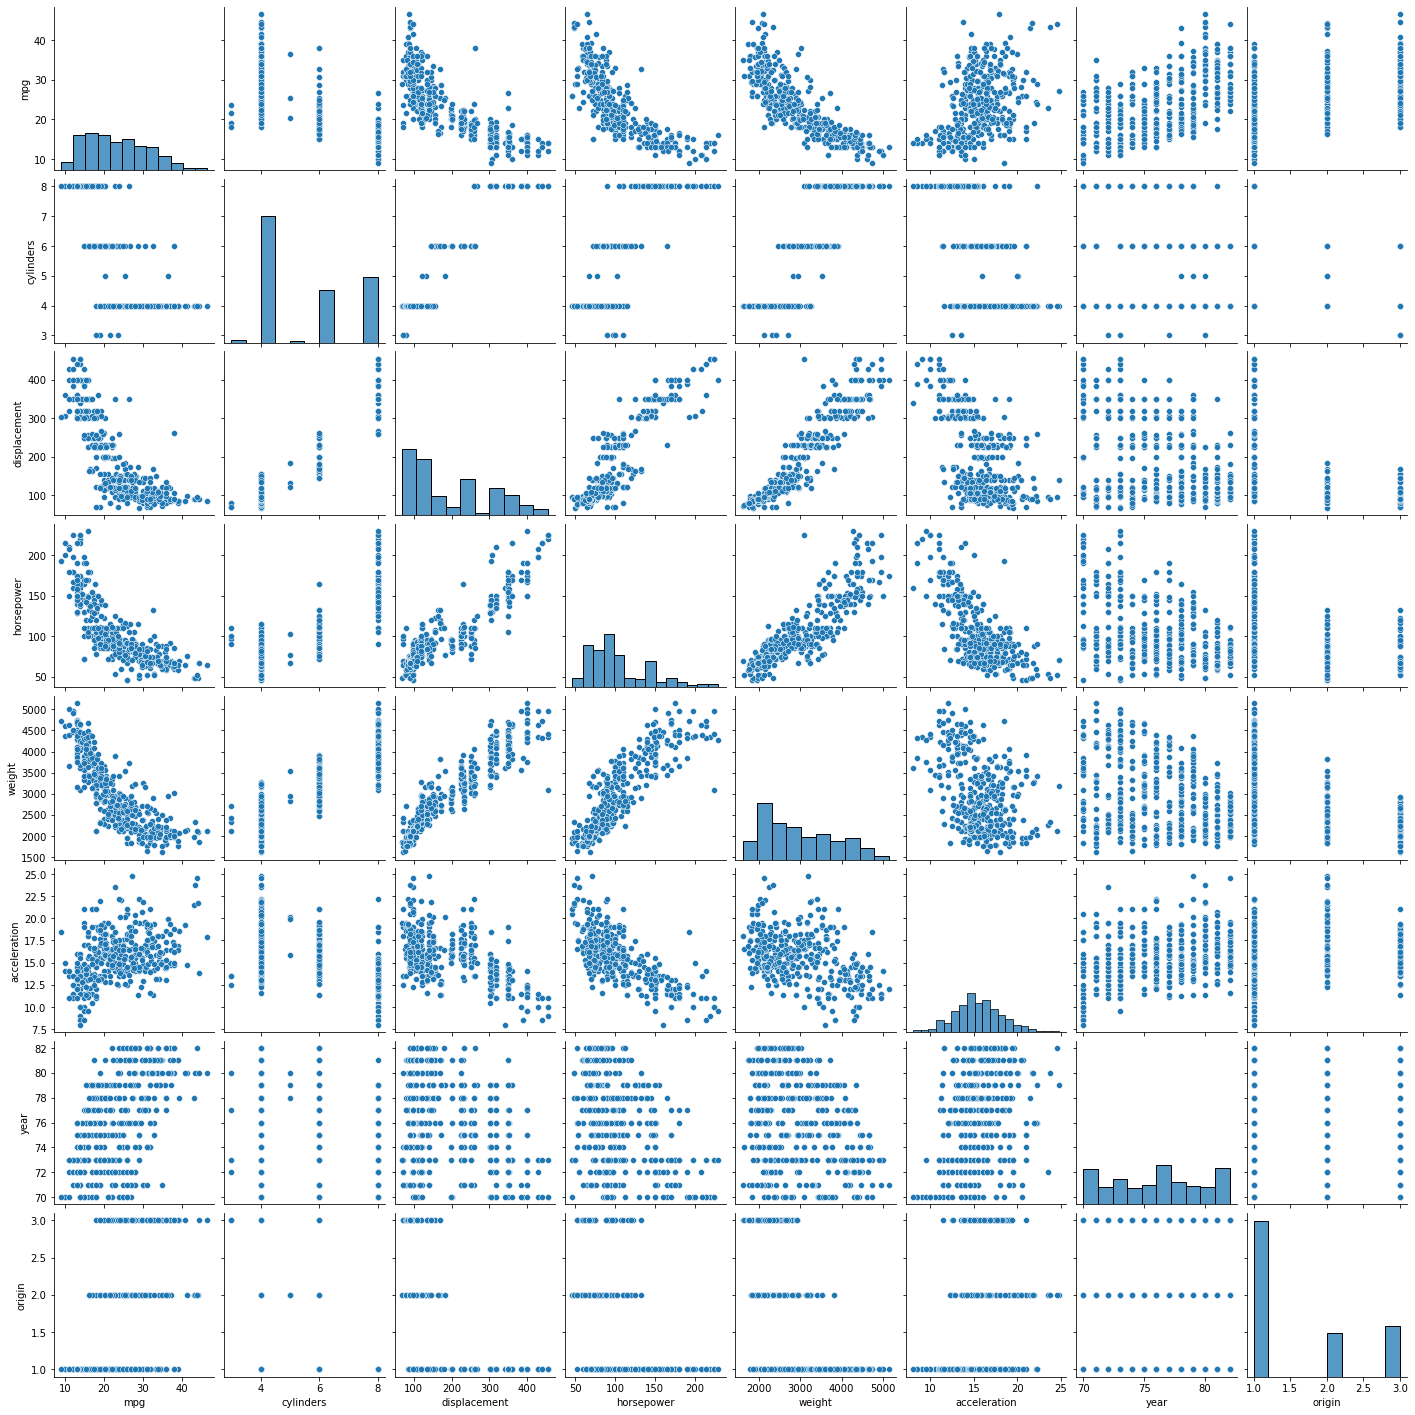

In [21]:
sns.pairplot(auto);

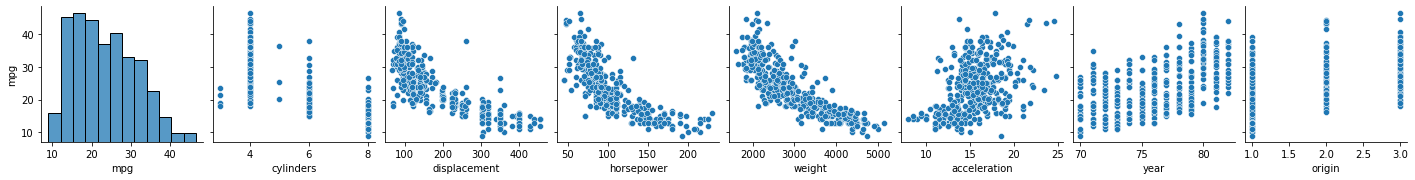

In [22]:
sns.pairplot(auto, y_vars='mpg');

#### (f) 
Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

**Answer:** All variable (besides `origin` and `acceleration`) have strong visual correlations with `mpg`. This makes sense since all of them have some sort of causal relation with car potency (`horsepower`, `displacement` and `cylinders`), technological advance (`year`) and the energy needed to move some mass (`weight`)

### 10. This exercise involves the Boston housing data set.


In [23]:
boston = pd.read_csv('../data/statlearning/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [24]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [25]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### (a)

To begin, load in the Boston data set. The Boston data set is
part of the ISLR2 library.

> library (ISLR2)

Now the data set is contained in the object Boston.

> Boston

Read about the data set:

> ?Boston

How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [26]:
boston.shape

(506, 13)

In [27]:
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### (b)
Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

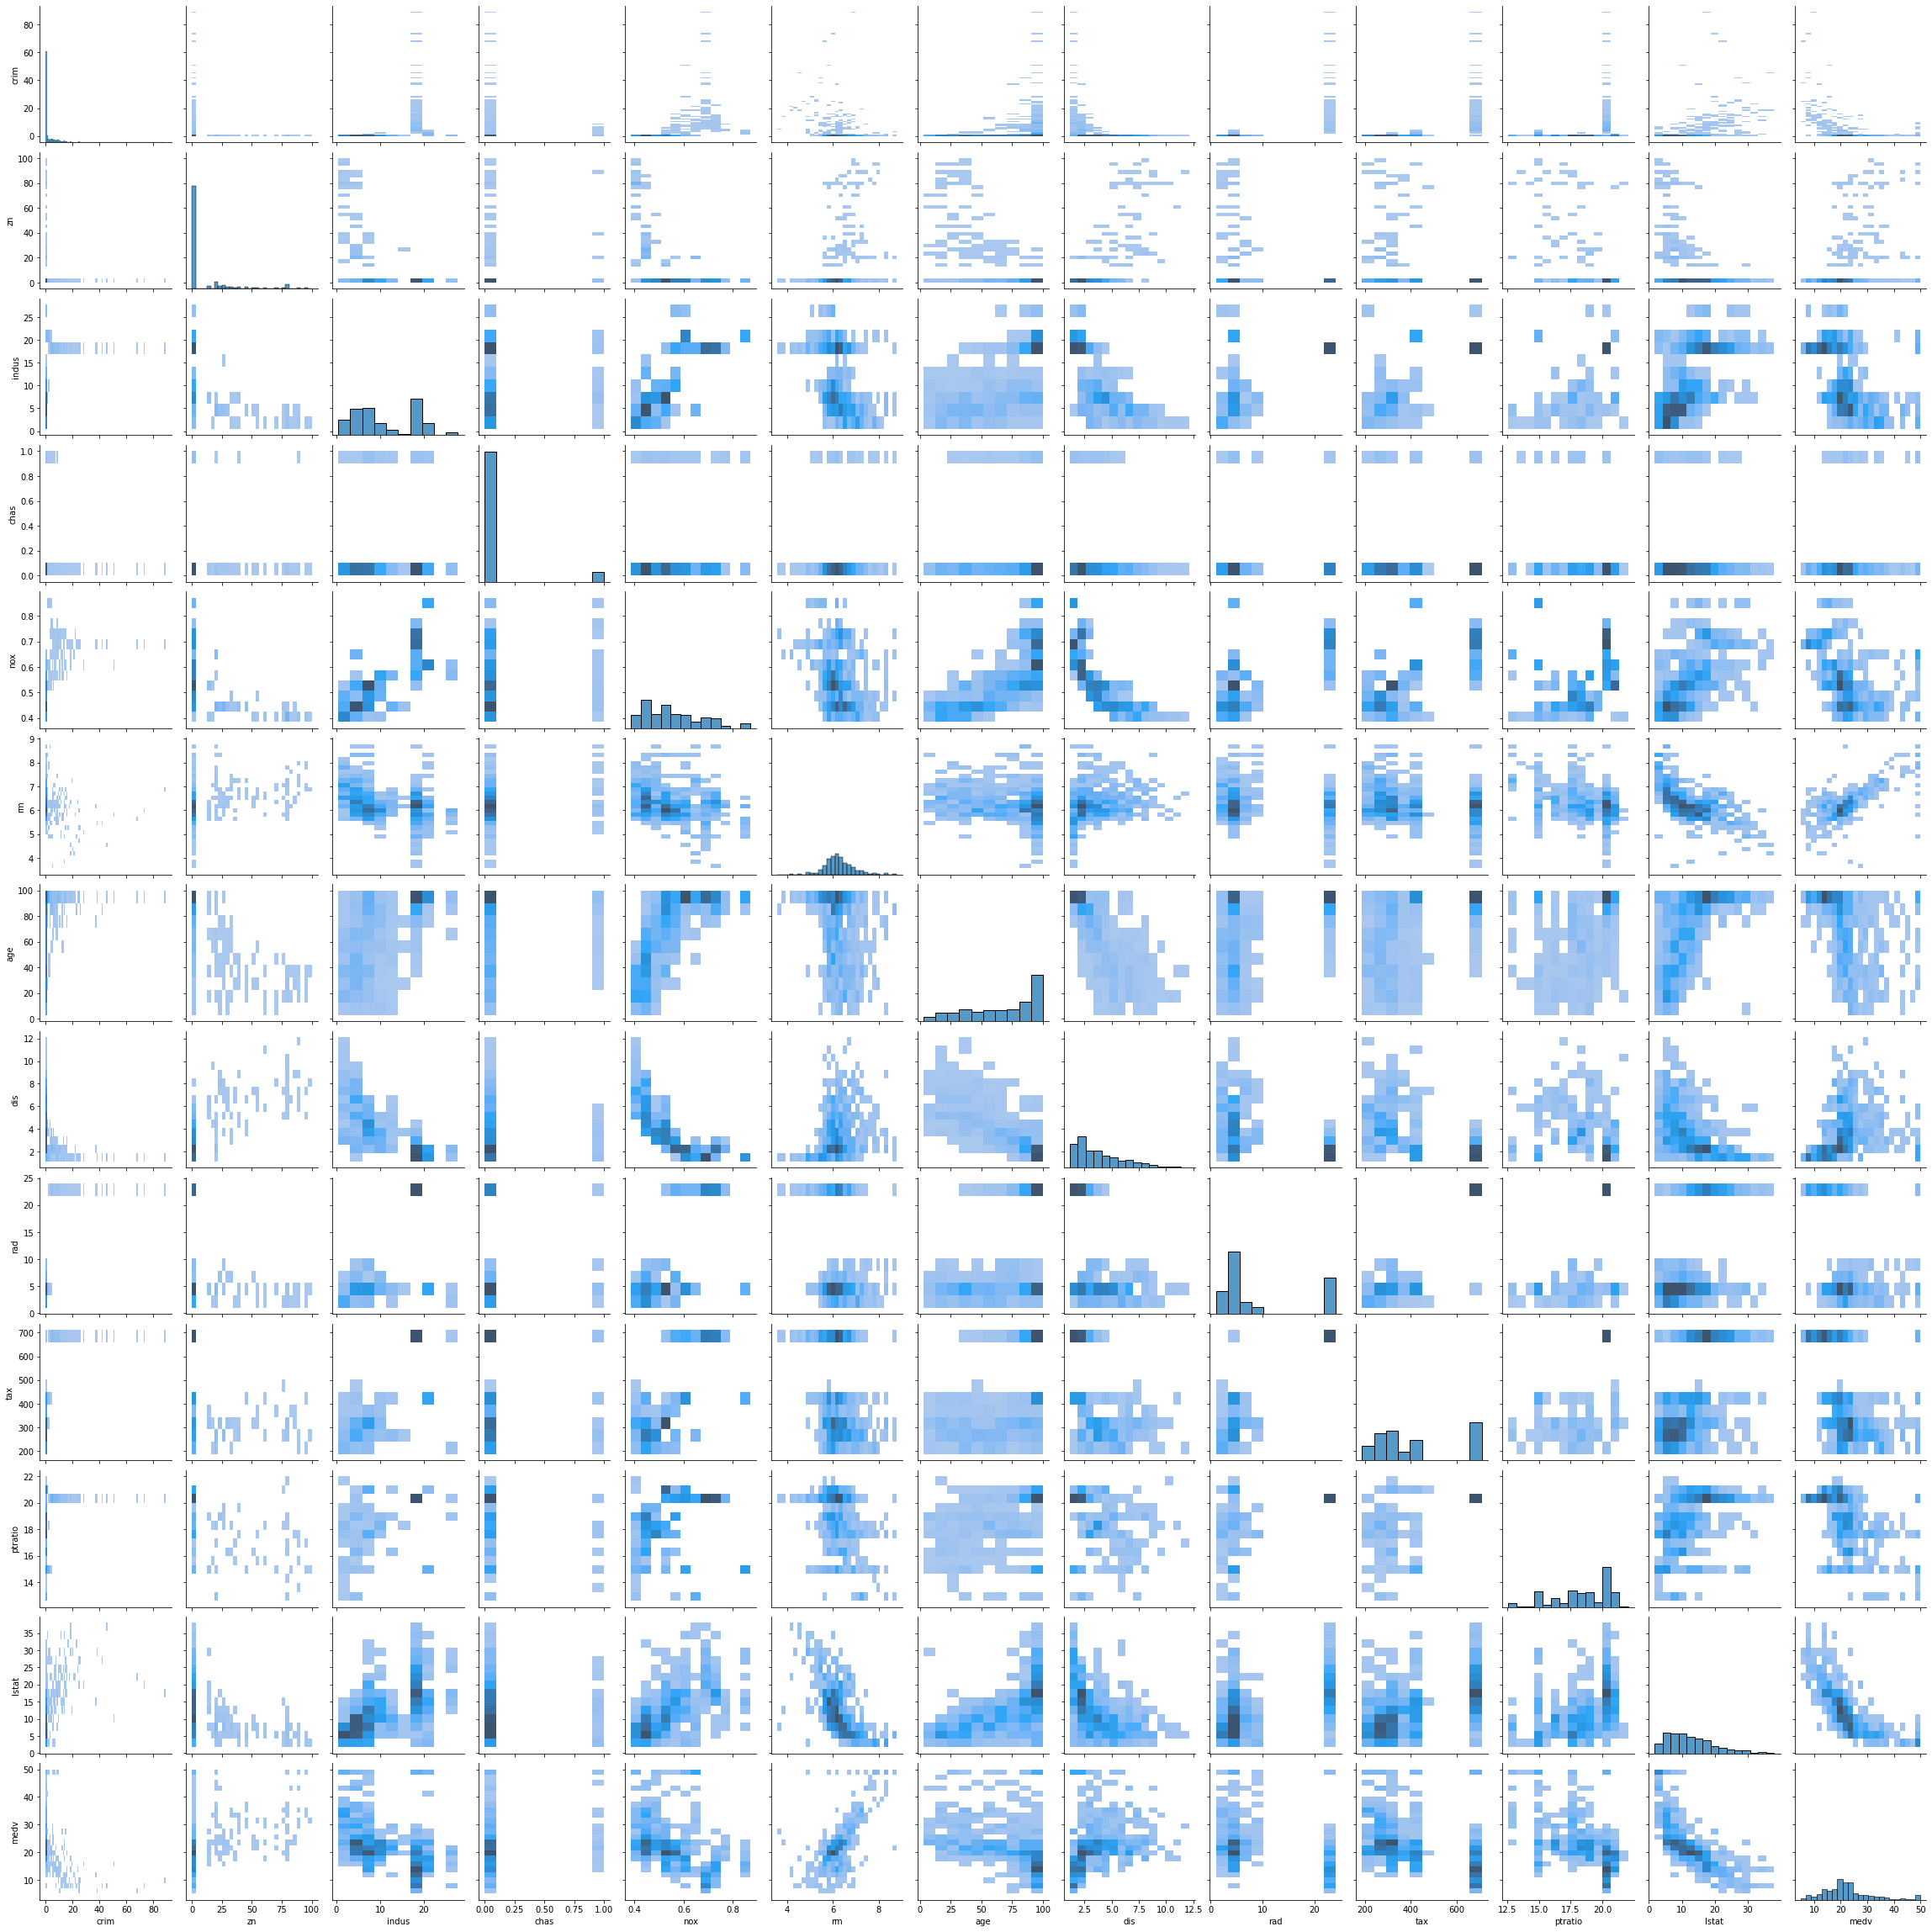

In [28]:
sns.pairplot(boston, kind='hist');

There is a good positive correlation between `rm` and `medv`, as bigger houses have higher values than smaller ones.

`nox` appears to be positively correlated with `indus`. It is also negatively correlated with `dis`. It is shown that nitric oxides concentration are lower on less active areas.

`lstat` and `ds` are negatively correlated, as higher classes tends to live closer to the active regions



#### (c) 
Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

In [29]:
boston.drop('chas', axis=1).corr().iloc[1:,0].sort_values()

medv      -0.388305
dis       -0.379670
rm        -0.219247
zn        -0.200469
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
Name: crim, dtype: float64

`medv` and `dis` are negatively correlated, since crime tends to devaluated regions and distant areas (`lstat` positively correlated with `crim`) tends to have less attention from public policy.

#### (d) 
Do any of the census tracts of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.


In [30]:
boston.sort_values(by='crim', ascending=False).head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
411,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0
405,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,27.38,8.5
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
428,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,14.52,10.9
414,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,20.08,16.3
418,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64,10.4


In [31]:
boston.sort_values(by='tax', ascending=False).head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
493,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1
492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
489,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
406,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
453,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27,16.1
457,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666,20.2,19.01,12.7
456,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,18.13,14.1
455,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666,20.2,18.71,14.9


In [32]:
boston.sort_values(by='ptratio', ascending=False).head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
355,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2
356,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
136,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,16.96,18.1
128,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
137,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,16.90,17.4
142,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,34.41,14.4
140,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,18.46,17.8
139,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,21.32,13.3
138,0.35233,0.0,21.89,0,0.624,6.454,98.4,1.8498,4,437,21.2,14.59,17.1
141,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,24.16,14.0


#### (e) 
How many of the census tracts in this data set bound the Charles
river?


In [33]:
boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

#### (f) 
What is the median pupil-teacher ratio among the towns in this
data set?

In [34]:
boston['ptratio'].median()

19.05

#### (g) 
Which census tract of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors
for that census tract, and how do those values compare to the
overall ranges for those predictors? Comment on your findings.

In [35]:
boston[boston['medv'] == boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [36]:
boston.drop('chas', axis=1).describe().loc[['mean', 'min', '25%', '50%', '75%', 'max']]

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


High crime rates, small lots, few teachers and higher percentage of lower status.

#### (h) 
In this data set, how many of the census tracts average more
than seven rooms per dwelling? More than eight rooms per
dwelling? Comment on the census tracts that average more than
eight rooms per dwelling

In [37]:
boston[boston['rm']>7]['rm'].size

64

In [38]:
boston[boston['rm']>8]['rm'].size

13

In [39]:
boston[boston['rm']>8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0


Most of them are old houses with high average price.